# Working with NLTK

In this notebook we're going to do some basic analysis of some textual data using the Natural Language Processing Toolkit (NLTK). However, before we do this, we'll have to load the data into it. 

Before you can do any computational work with humanities data, you have to find some in a usable format (which might be somewhere like Project Gutenberg, for example). I've already prepared some for you from the Survey of London website and have saved it in a file called 'sugar_docs.json' inside a folder called 'data'. (If you'd like to learn how to do it yourself, there's an extra notebook inside the folder which contains this one called 'Importing Data'). 

To start working with it, we'll use Python's built-in ```open``` function to open the file and extract the data. We'll store the open file in a new variable, ```f```:

In [1]:
f = open(file='data/sugar_docs.json', mode='r')

The data from the Survey of London site is stored in a format called 'JSON', which stands for JavaScript Object Notation. Don't worry about the name: the important bit to note is it looks a bit like a Python list or dictionary: a collection of items, or keys and values.

However, before we can use it, we have to do a little bit of processing first. Python has a library for handling this data, called (unsurprisingly) ```json```. If we import it into our notebook, we can *parse* our JSON data and save at as a native Python data type.

In [2]:
import json
sugar_docs = json.load(f)

Let's check that it worked:

In [3]:
print(type(sugar_docs))

<class 'list'>


Good. We have our data in a form that Python can work with directly. Let's import another function ```pprint``` (Pretty Print) and take a look at what's in there.

In [4]:
from pprint import pprint
pprint(sugar_docs)

[{'author': {'id': 2, 'username': 'surveyoflondon'},
  'body': '<p><em>Medieval churches</em></p>\n'
          '\n'
          '<p>The first church on the site that is now Altab Ali Park was '
          'built in the mid thirteenth century (by 1282), dedicated to Mary '
          'and from the outset identified as ‘de Matefelun’. This, which '
          'became Matfelon, may derive from a family name; Richard Matefelun, '
          'a wine merchant, is said to have been present in the area in 1230. '
          'If this is the derivation (matfelon as meaning knapweed is the '
          'least preposterous of numerous suggested alternatives), it was '
          'presumably in recognition of a pious benefaction, whether prompted '
          'by local need or not. It does seem clear that there would have been '
          'significant population growth in the area, and that the existing '
          'parish church of St Dunstan, Stepney, aside from being distant had '
          'been outgrown

          'that, in the words of Lord Rowton, an Archbishop might sleep there '
          'in decency and comfort. All other accommodation - dining-room, '
          'smoking-room, reading-room, and bathrooms - is found on the ground '
          'floor. In the locker corridors are fitted the wardrobe cupboards, '
          'where each man may keep his clothes and possessions under lock and '
          "key. Other conveniences include dressing-rooms, barber's shop, and "
          'a room each for shoemaker and tailor, where cheap repairs may be '
          'carried out, and new or secondhand goods obtained. The finest '
          'apartment in this "Poor Man\'s Hotel" is the dining-room, which has '
          'table room for 456 men. Here anything may be bought at cost price - '
          "from cooked meat at 4d. to a farthing's worth of milk or sugar. "
          'There are also provided all necessary cooking utensils for the '
          'gratuitous use of lodgers desirous of catering

          '‘sal-ammoniac manufacturer’, having patented the production of sal '
          'ammonia by a sulphate process in 1792, for use by jewellers and '
          'stained-glass makers, possibly also in foodstuffs. Menish was '
          'manufacturing hartshorn (ammonium carbonate), probably for '
          'medicinal purposes, at 111 Whitechapel Road in 1805, in which year '
          'he sublet his Coles Alley premises to John Burnell, a horner of Old '
          'Montague Street. At this point, John Warner had a foundry on Coles '
          'Alley.[^5] The King’s Arms public house retreated to the west side '
          'of the court entrance (No. 57) and William and Henry Clayton, '
          'drapers, held sway at the site of Nos 53–55 from a rebuilding of '
          '1847 to 1890–1 when those premises were adapted to be Tee-To-Tum '
          'Tea Stores, a café and club for the Tea Planters’ Association, with '
          'A. H. Thompson as the architect.[^6]</p>\n'
        

                           'type': 'MultiPolygon'},
              'id': 452,
              'properties': {'address': 'Davenant Youth Centre, 179 '
                                        'Whitechapel Road',
                             'b_name': 'Davenant Youth Centre (former Davenant '
                                       'School)',
                             'b_number': '179',
                             'count': 17,
                             'feature_type': 'WHITECHAPEL_BUILDING',
                             'street': 'Whitechapel Road'},
              'type': 'Feature'},
  'id': 450,
  'last_edited': '2018-01-22',
  'title': 'The first Davenant School'},
 {'author': {'id': 2, 'username': 'surveyoflondon'},
  'body': '<p>The Whitechapel Society for the Education of the Poor was formed '
          'in September 1812 as an early\xa0branch of the National Society '
          '(see above). Daniel Mathias, Whitechapel’s Rector since 1807, '
          'headed this initiative towa

If everything went to plan, pprint should output a big chunk of data in the form of a *list* of *dictionaries*. Each dictionary contains an individual document from the Survey of London Whitechapel website and some metadata related to it such as who wrote it, when it was published, and what building in Whitechapel it's about.

## Cleaning Text Data

Now we've loaded our data into our notebook, we can start doing stuff with it. The data we've downloaded is a collection of documents, each of which contains the word 'sugar'. As this is textual data, we can use the Natural Language Toolkit, or NLTK, to start exploring it.

NLTK is a collection of tools for performing computational analysis on texts. It's a huge library with a lot of functionality, but we can use some of its more basic functions to give us a better idea of what's in the data we've just downloaded.

However (and this might be becoming a bit of a running theme), we'll need to *clean* our text data to get rid of anything that we're not interested in.

Our data is in the format of a list of dictionaries. That means that we can access different elements within it using the list index and dictionary key syntax we saw in the previous notebook. Let's print the body text of the first the document: 

In [10]:
print(sugar_docs[5]['body'])

<p>'To-morrow the fifth of the Rowton Houses will be opened to receive guests. Situated 400 yards from St Mary's Station, Whitechapel, it stands with its frontage in Fieldgate-st., in the very midst of an enormous population. Within two or three weeks probably every one of its 816 cubicles will be occupied. The rent of 6d. a night, or 3s. 6d. a week, covers the cost of all accommodation by day as well as night. So perfect has been the construction of these Rowton Houses that, except in trifling details, it has not been possible to introduce any improvement in the last building. Without a retrogression, the primary conception has been adhered to of giving each man a separate cubicle with a separate window under his control; and such privacy and such a bed that, in the words of Lord Rowton, an Archbishop might sleep there in decency and comfort. All other accommodation - dining-room, smoking-room, reading-room, and bathrooms - is found on the ground floor. In the locker corridors are fit

As this document is intended to be viewed on the web, it's full of *html tags* like ```<p>``` and ```<em>``` and so forth. NLTK won't know what to do with these, so we need to strip them out. The 'Beautifulsoup' library can help us here. It's a two-step process to get our cleaned text: first, we have to read our text using BeautifulSoup and store the result in a new variable. Once we've done this, we can use BeautifulSoup's 'get_text' function to *strip* out the tags.

In [11]:
from bs4 import BeautifulSoup
s = BeautifulSoup(sugar_docs[0]['body'], 'html.parser')
s.get_text(strip=True)

'Medieval churchesThe first church on the site that is now Altab Ali Park was built in the mid thirteenth century (by 1282), dedicated to Mary and from the outset identified as ‘de Matefelun’. This, which became Matfelon, may derive from a family name; Richard Matefelun, a wine merchant, is said to have been present in the area in 1230. If this is the derivation (matfelon as meaning knapweed is the least preposterous of numerous suggested alternatives), it was presumably in recognition of a pious benefaction, whether prompted by local need or not. It does seem clear that there would have been significant population growth in the area, and that the existing parish church of St Dunstan, Stepney, aside from being distant had been outgrown. Parish status was granted by 1320, the vicarage being in the gift of the Rector of Stepney. [^1]Archaeological evidence indicates that the church, always aligned to the adjacent road and not properly oriented,\xa0was of clunch or white chalk rubble. It 

As you can see, this has stripped out all the html tags. 

**Exercise: Save the cleaned text to a new variable called 'cleaned_text' and then print it.**

In [14]:
cleaned_text = s.get_text(strip=True)
print(cleaned_text)

Medieval churchesThe first church on the site that is now Altab Ali Park was built in the mid thirteenth century (by 1282), dedicated to Mary and from the outset identified as ‘de Matefelun’. This, which became Matfelon, may derive from a family name; Richard Matefelun, a wine merchant, is said to have been present in the area in 1230. If this is the derivation (matfelon as meaning knapweed is the least preposterous of numerous suggested alternatives), it was presumably in recognition of a pious benefaction, whether prompted by local need or not. It does seem clear that there would have been significant population growth in the area, and that the existing parish church of St Dunstan, Stepney, aside from being distant had been outgrown. Parish status was granted by 1320, the vicarage being in the gift of the Rector of Stepney. [^1]Archaeological evidence indicates that the church, always aligned to the adjacent road and not properly oriented, was of clunch or white chalk rubble. It thus

The text is now in a state that NLTK can work with. However, we've got one more step before we can do anything: import nltk and download some resources.

When you run the cell below, you'll be presented with an interactive prompt to download data. Type 'd' followed by the enter key, then type 'popular' and press enter again. Once it's finished downloading, type 'q' followed by enter to end the script.

In [15]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> popular
       | 
       | Downloading package cmudict to /home/nbuser/nltk_data...
       |   Unzipping corpora/cmudict.zip.
       | Downloading package gazetteers to /home/nbuser/nltk_data...
       |   Unzipping corpora/gazetteers.zip.
       | Downloading package genesis to /home/nbuser/nltk_data...
       |   Unzipping corpora/genesis.zip.
       | Downloading package gutenberg to /home/nbuser/nltk_data...
       |   Unzipping corpora/gutenberg.zip.
       | Downloading package inaugural to /home/nbuser/nltk_data...
       |   Unzipping corpora/inaugural.zip.
       | Downloading package movie_reviews to
       |     /home/nbuser/nltk_data...
       |   Unzipping corpora/mov

True

## Detecting Words and Sentences

One of the most basic things nltk can do is detect words in a chunk of text. This is called *tokenisation*. 

Let's try it:

In [16]:
word_tokens = nltk.word_tokenize(cleaned_text)
print(word_tokens)

['Medieval', 'churchesThe', 'first', 'church', 'on', 'the', 'site', 'that', 'is', 'now', 'Altab', 'Ali', 'Park', 'was', 'built', 'in', 'the', 'mid', 'thirteenth', 'century', '(', 'by', '1282', ')', ',', 'dedicated', 'to', 'Mary', 'and', 'from', 'the', 'outset', 'identified', 'as', '‘de', 'Matefelun’', '.', 'This', ',', 'which', 'became', 'Matfelon', ',', 'may', 'derive', 'from', 'a', 'family', 'name', ';', 'Richard', 'Matefelun', ',', 'a', 'wine', 'merchant', ',', 'is', 'said', 'to', 'have', 'been', 'present', 'in', 'the', 'area', 'in', '1230', '.', 'If', 'this', 'is', 'the', 'derivation', '(', 'matfelon', 'as', 'meaning', 'knapweed', 'is', 'the', 'least', 'preposterous', 'of', 'numerous', 'suggested', 'alternatives', ')', ',', 'it', 'was', 'presumably', 'in', 'recognition', 'of', 'a', 'pious', 'benefaction', ',', 'whether', 'prompted', 'by', 'local', 'need', 'or', 'not', '.', 'It', 'does', 'seem', 'clear', 'that', 'there', 'would', 'have', 'been', 'significant', 'population', 'growth'

It can also detect sentences:

In [17]:
sentence_tokens = nltk.sent_tokenize(cleaned_text)
print(sentence_tokens)

['Medieval churchesThe first church on the site that is now Altab Ali Park was built in the mid thirteenth century (by 1282), dedicated to Mary and from the outset identified as ‘de Matefelun’.', 'This, which became Matfelon, may derive from a family name; Richard Matefelun, a wine merchant, is said to have been present in the area in 1230.', 'If this is the derivation (matfelon as meaning knapweed is the least preposterous of numerous suggested alternatives), it was presumably in recognition of a pious benefaction, whether prompted by local need or not.', 'It does seem clear that there would have been significant population growth in the area, and that the existing parish church of St Dunstan, Stepney, aside from being distant had been outgrown.', 'Parish status was granted by 1320, the vicarage being in the gift of the Rector of Stepney.', '[^1]Archaeological evidence indicates that the church, always aligned to the adjacent road and not properly oriented,\xa0was of clunch or white c

We saved the output from nltk.word_tokenize() and nltk.sent_tokenize() as new varibles, 'word_tokens' and 'sent_tokens'. These are just ordinary Python lists:

In [18]:
print(type(sentence_tokens))
print(type(word_tokens))

<class 'list'>
<class 'list'>


We can find the length of a list using Python's built-in ```len()``` function:

In [19]:
print(len(sentence_tokens))

162


**Excercise: How many words are there in our cleaned text?**

In [20]:
print(len(word_tokens))

4640


## Exploring a Text

Now we've got our text tokenized, we can do other things with it. First, we convert our word tokens into an nltk 'Text' object. This allows us to process it using some of NLTK's analysis tools.

In [21]:
nltk_text = nltk.Text(word_tokens)

We can access the words in our new nltk_text variable as if it were a list:

In [25]:
print(nltk_text[21])

by


We can also see what words tend to appear together:

In [26]:
print(nltk_text.collocations())

Mary Matfelon; Sept. 1880; Jan. 1875; red brick; Whitechapel’s rector;
Drawings Collection; Last Supper; RIBA Drawings; Tower Hamlets; Oct.
1880; Lambeth Palace; Palace Library; short history; Portland stone;
carved oak; early 1880s; Building News; Walker Revised; medieval
church; July 1875
None


And we can also find the context in which different words appear:

In [27]:
print(nltk_text.concordance('brick'))

Displaying 6 of 6 matches:
tion departing to a meeting house in Brick Lane . In 1662 Walley was arrested p
on to defend the proposed use of red brick , averring , wrongly , that ‘our gre
 , convinced in their dislike of red brick , and anyway keen to have a larger c
 rest from Coope . [ ^27 ] The large brick church comprised a nave ( 109ft long
ly leasehold . While adhering to red brick , Lee had amended his plans . The ch
carved Bath stone dressings to naked brick surfaces ( perhaps intended for deco
None


We can also find out how many times a word appears in the text:

In [28]:
print(nltk_text.count('tower'))

10


And we can show a graph or where in a text a list of words appear:
(You might have to run this twice)

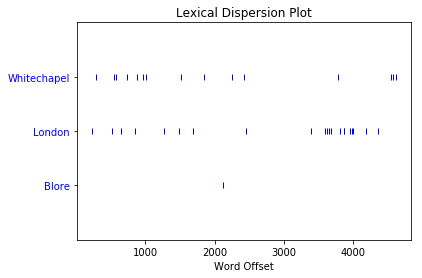

In [30]:
nltk_text.dispersion_plot(['Whitechapel', 'London', 'Blore'])

### Exercise

Using the .concordance() and .count() functions, can you work out:

- How many different people with the first name 'Edward' are mentioned in the text?
- Does the text tell you what each of them did?
- Which of them do you think is the most important?

In [40]:
print(nltk_text.concordance('Coope'))

Displaying 12 of 12 matches:
hen , in June 1874 , Octavius Edward Coope came to the rescue . Coope was a wea
us Edward Coope came to the rescue . Coope was a wealthy brewer , a founder of 
 a wealthy brewer , a founder of Ind Coope & Co. in Romford in 1845 , which fir
 . With that newly acquired status , Coope stepped forward claiming to be a Whi
o be a Whitechapel parishioner – Ind Coope & Co. had offices and a depot on the
 on the west side of Osborn Street , Coope himself lived in Essex and , when in
pted with great relief and joy , but Coope had soon to defend the proposed use 
timated to be about £6,000 more than Coope was offering . Cohen’s committee con
it is expedient that the offer of Mr Coope be accepted.’ [ ^26 ] Rebuilding beg
 public subscription , the rest from Coope . [ ^27 ] The large brick church com
itto and Gadesden led an approach to Coope , still an MP , who undertook to use
last made in 1886–7 as a memorial to Coope . Carved by Earp , it represented th
None


___
We can also find out what the most common words are. To find this out, we produce a **Freq**uency **Dist**ribution (*FreqDist*) object. The .lower() command converts the words to lower case for comparison, so it will flag up upper *and* lower case occurrences of the word. Passing a number to fd.plot() tells it to only graph the top 20 words.

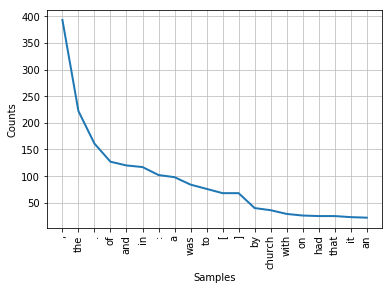

In [41]:
fd = nltk.FreqDist(word.lower() for word in word_tokens)
fd.plot(20)

Which isn't really that helpful: we've still got a lot of cruft in there - punctuation marks and very common words like 'the'. However, we can use nltk's 'Parts of Speech' tagging capabilities to do something more useful.

## Parts of Speech

We can identify parts of speech using the ```.pos_tag()``` function:

In [42]:
tagged = nltk.pos_tag(word_tokens)

If you print one of our tagged word tokens, you get this:

In [43]:
print(tagged[35])

('Matefelun’', 'NNP')


ie. the tagger has identified 'Matefelun' as 'NNP', or a proper noun (which seems about right to me). More parts of speech (POS) codes can be found on this [cheat sheet](http://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html).

We can now use these tags to build a more useful frequency distribution. To do this we're going to use a two new concepts - a *for* loop and an *if* statement.

In the code above where we made our first frequency distribution, we used a for loop to transform each word in word_tokens to lower case. Whilst we won't go into to much detail here, a 'for' loop is a piece of code which lets you repeat an instruction a number of times. An 'if' statement, on the other hand, allows you to execute an instruction only if a certain condition is met.

It's worth understanding a bit about what it means. In the next piece of code, we set up *fd*, a new variable which will store our frequency distribution information. Then we use a 'for' loop, which looks like this:

```
for word in tagged:
    ...do something
```

This goes through every element of our tagged words one at a time, storing each one in a temporary variable called ```word```. Then, for each word, we check that it has one of the permitted tags (defined as a list in the first line), and make sure it's at least 3 characters long, which will help us discard punctuation and shorter words like 'a' or 'an':

```
if word[1] in permitted_tags and len(word[0]) > 2:'
```
To put this in English - 'If the part of speech code of this word is in the list of permitted tags *and* it's longer than two characters, execute the following code'. Note that the *and* means both of these conditions have to be true - if both *are* true, only then does the following statement execute:

```
fd[word[0]] = fd[word[0]] + 1
```

Which increases the count for that word. So, this code increases the count for a word if (and only if) it's at least 3 characters long, and it's of the correct tag.

Let's see what it does:

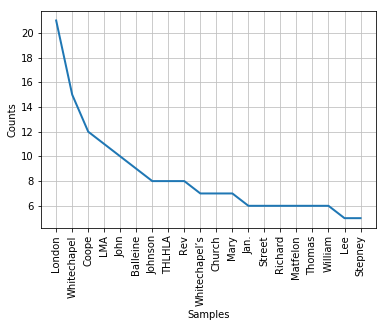

In [45]:
permitted_tags = ['NNP']

fd = nltk.FreqDist()

for word in tagged:
    if word[1] in permitted_tags and len(word[0])>2:
        fd[word[0]] = fd[word[0]] + 1
        
fd.plot(20)

One final remark: we haven't dealt with **indents** much in Python, but indenting the code like above, after the for statement, and *again* after the if statement, is the way that python knows it's dealing with a loop (for) and a conditional (if). If your code doesn't work, check the colons are there (:) and the indenting is too.

### Exercise

Paste the code in the cell above into the one below and modify it to graph different parts of speech. What do you think the article is about?